# Module 85 Callback Functions Assignment

Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.































In [1]:
!pip install tensorflow keras

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint

Q2. Load the Wine Quality dataset and explore its dimensions.
Dataset link: https://www.kaggle.com/datasets/nareshbhat/wine-quality-binary-classification

In [2]:
from google.colab import files

files.upload()

Saving winequality.csv to winequality.csv


{'winequality.csv': b'fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality\r\n7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8,6\r\n6.3,0.3,0.34,1.6,0.049,14,132,0.994,3.3,0.49,9.5,6\r\n8.1,0.28,0.4,6.9,0.05,30,97,0.9951,3.26,0.44,10.1,6\r\n7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6\r\n7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6\r\n8.1,0.28,0.4,6.9,0.05,30,97,0.9951,3.26,0.44,10.1,6\r\n6.2,0.32,0.16,7,0.045,30,136,0.9949,3.18,0.47,9.6,6\r\n7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8,6\r\n6.3,0.3,0.34,1.6,0.049,14,132,0.994,3.3,0.49,9.5,6\r\n8.1,0.22,0.43,1.5,0.044,28,129,0.9938,3.22,0.45,11,6\r\n8.1,0.27,0.41,1.45,0.033,11,63,0.9908,2.99,0.56,12,5\r\n8.6,0.23,0.4,4.2,0.035,17,109,0.9947,3.14,0.53,9.7,5\r\n7.9,0.18,0.37,1.2,0.04,16,75,0.992,3.18,0.63,10.8,5\r\n6.6,0.16,0.4,1.5,0.044,48,143,0.9912,3.54,0.52,12.4,7\r\n8.3,0.42,0.62,19.25,0.04,41,172,1.0002,2.98,0.67,9.7,5\r\n6.

In [59]:
df = pd.read_csv('winequality.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Q3. Check for null values, identify categorical variables, and encode them.

In [60]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


Analysis: It is good that there is no null data in the Wine dataset.

In [61]:
df = pd.get_dummies(df)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
df.dtypes

,0
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64
sulphates,float64


Analysis: There is no Categorical column in the dataset, hence no Encoding required.

In [62]:
# Converting the Quality column to Binary for Binary Classification

df['quality'] = (df['quality'] >= 6).astype(int)

In [66]:
df['quality'].head(50)

,quality
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


Q4. Separate the features and target variables from the dataframe.

In [67]:
x = df.drop("quality", axis= 1)
y = df["quality"]

In [68]:
x.shape, y.shape

((4898, 11), (4898,))

Q5. Perform a train-test split and divide the data into training, validation, and test datasets.

In [69]:
# Train-test split
x_train_full, x_test, y_train_full, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

# Train-validate split
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full, test_size = 0.2, random_state = 42)

print("total rows/ x:", x.shape)
print("\nx_train.shape:", x_train.shape)
print("\nx_valid.shape:", x_valid.shape)
print("\nx_test.shape:", x_test.shape)


total rows/ x: (4898, 11)

x_train.shape: (3134, 11)

x_valid.shape: (784, 11)

x_test.shape: (980, 11)


Q6. Perform scaling on the dataset.

In [70]:
scaler = StandardScaler()

X_train = scaler.fit_transform(x_train)
X_valid = scaler.transform(x_valid)
X_test = scaler.transform(x_test)

Q7. Create at least 2 hidden layers and an output layer for the binary categorical variables.

In [71]:
clf_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Q8. Create a Sequential model and add all the layers to it.

In [72]:
clf_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

Q9. Implement a TensorBoard callback to visualize and monitor the model's training process.

In [73]:
log_dir_path = "tensorboard_logs"
tensorboard_cb = TensorBoard(log_dir= log_dir_path)

Q10. Use Early Stopping to prevent overfitting by monitoring a chosen metric and stopping the training if no improvement is observed.

In [74]:
early_stop_cb = EarlyStopping(monitor= "val_loss", patience= 5, restore_best_weights= True)

Q11. Implement a ModelCheckpoint callback to save the best model based on a chosen metric during training.

In [75]:
checkpoint_cb = ModelCheckpoint("best_model.keras", save_best_only= True)

Q12. Print the model summary.

In [76]:
clf_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

Q13. Use binary cross-entropy as the loss function, Adam optimizer, and include the metric ['accuracy'].

In [77]:
LOSS = "binary_crossentropy"
OPTIMIZER = "adam"
METRICS = ["accuracy"]

Q14. Compile the model with the specified loss function, optimizer, and metrics.

In [78]:
clf_model.compile(loss= LOSS, optimizer= OPTIMIZER, metrics= METRICS)

Q15. Fit the model to the data, incorporating the TensorBoard, Early Stopping, and ModelCheckpoint callbacks.

In [79]:
VALIDATION = (X_valid, y_valid)
EPOCHS = 50
BATCH_SIZE = 32
CALLBACKS = [tensorboard_cb, early_stop_cb, checkpoint_cb]

history= clf_model.fit(
              X_train, y_train,
              validation_data= VALIDATION,
              epochs= EPOCHS,
              callbacks= CALLBACKS)


Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.6764 - loss: 0.6217 - val_accuracy: 0.7755 - val_loss: 0.4942
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7644 - loss: 0.5047 - val_accuracy: 0.7997 - val_loss: 0.4623
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7556 - loss: 0.4912 - val_accuracy: 0.8048 - val_loss: 0.4586
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7831 - loss: 0.4581 - val_accuracy: 0.8036 - val_loss: 0.4626
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7811 - loss: 0.4596 - val_accuracy: 0.8048 - val_loss: 0.4529
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7774 - loss: 0.4721 - val_accuracy: 0.8061 - val_loss: 0.4551
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7768 - loss: 0.4670 - val_accuracy: 0.8023 - val_loss: 0.4484
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7752 - loss: 0.4616 - val_accuracy: 0.8010 - val_loss

Q16. Get the model's parameters.

In [80]:
weights = clf_model.get_weights()
weights

[array([[-0.14689377, -0.32326797, -0.12009321, -0.21852507, -0.07638229,
          0.23609367, -0.14731944,  0.06912912,  0.09454838,  0.03576991,
         -0.1283182 , -0.008456  , -0.19319506, -0.15517893, -0.09175924,
         -0.09710038, -0.22836734, -0.01769092, -0.10351731, -0.05207779,
         -0.02669878, -0.13434975,  0.11340583,  0.26049712,  0.14780004,
         -0.05540912, -0.12865159, -0.06404807, -0.0717463 , -0.27272773,
          0.21807633,  0.2788088 ,  0.11825217,  0.20801282, -0.08100935,
         -0.28828135,  0.05563076,  0.02796395, -0.2739347 , -0.23943323,
         -0.10955383, -0.10251979, -0.07582966, -0.20489831, -0.07928418,
         -0.12969725, -0.18292393, -0.10597613,  0.27372363,  0.03748149,
         -0.06198175, -0.17885979, -0.18842453, -0.21852739, -0.03370145,
         -0.0284738 ,  0.259107  , -0.16562806,  0.2959577 ,  0.08821747,
         -0.05586666,  0.04632996,  0.01227354, -0.13054442],
        [-0.13484344,  0.0488197 ,  0.17768805, -0

Q17. Store the model's training history as a Pandas DataFrame.

In [81]:
history_df = pd.DataFrame(history.history)
history_df.head()

,accuracy,loss,val_accuracy,val_loss
0,0.705488,0.578522,0.775510,0.494213
1,0.763561,0.499645,0.799745,0.462340
2,0.767071,0.485294,0.804847,0.458616
3,0.769304,0.478799,0.803571,0.462583
4,0.775048,0.471518,0.804847,0.452941


Q18. Plot the model's training history.

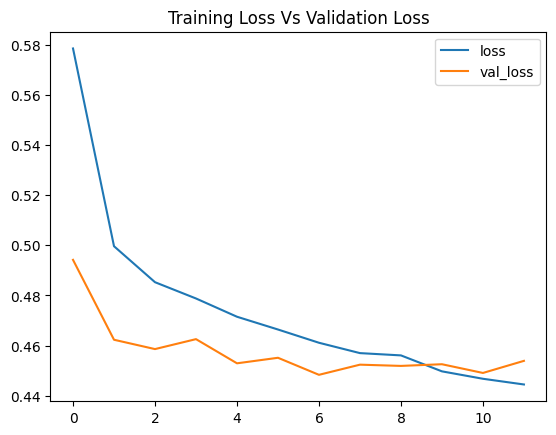

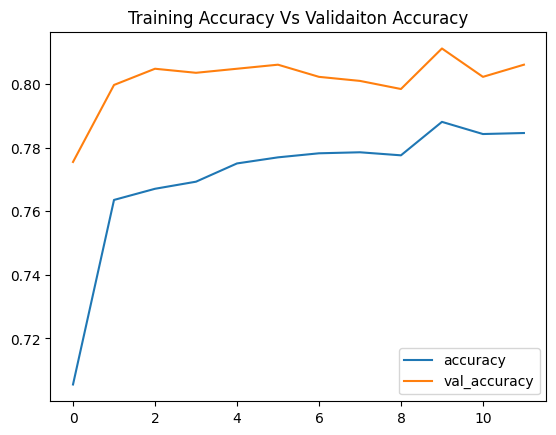

In [82]:
history_df[["loss", "val_loss"]].plot(title="Training Loss Vs Validation Loss")

history_df[["accuracy", "val_accuracy"]].plot(title="Training Accuracy Vs Validaiton Accuracy")

plt.show()

Q19. Evaluate the model's performance using the test data.

In [83]:
test_loss, test_accuracy = clf_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7775 - loss: 0.4777
Test Accuracy: 0.7663
